In [58]:
import warnings
warnings.filterwarnings('ignore')
from itertools import chain
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import string

<h3>Read in data, add header row and display first 5 rows:</h3>

In [59]:
text_df = pd.read_csv('./website_classification.xls')
#deleting 2 unecessary columns
del text_df['Unnamed: 0'], text_df['website_url']
print(text_df.head(5))

                                cleaned_website_text Category
0  official site good hotel accommodation big sav...   Travel
1  expedia hotel book sites like use vacation wor...   Travel
2  tripadvisor hotel book sites like previously d...   Travel
3  cheap flights search compare flights momondo f...   Travel
4  bot create free account create free account si...   Travel


<h4>Unique categories:</h4>

In [60]:
categories = list(text_df['Category'].unique())
print(categories)
print(text_df.shape)

['Travel', 'Social Networking and Messaging', 'News', 'Streaming Services', 'Sports', 'Photography', 'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce', 'Forums', 'Food', 'Education', 'Computers and Technology', 'Business/Corporate', 'Adult']
(1408, 2)


<h4>We have 1408 rows and 4 columns</h4>

In [61]:
cleaned_website_text = list(text_df['cleaned_website_text'].unique())
print(len(cleaned_website_text))

1375


<h4>There are 1375 unique rows</h4>

<h3>Number of rows by category</h3>

In [62]:
print(text_df['Category'].value_counts())

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: Category, dtype: int64


In [63]:
text_df.drop(text_df[text_df['Category']=='Forums'].index ,inplace = True)
text_df.drop(text_df[text_df['Category']=='Adult'].index ,inplace = True)

<h3>Number of <B><I>unique</I></B> rows by category</h3>

In [64]:
cat_unique_val = {}

for category in categories:
    mask = text_df['Category'] == category
    list_length = len(list(text_df[mask]['cleaned_website_text'].unique()))
    cat_unique_val.update({category: list_length})

print(cat_unique_val)

{'Travel': 106, 'Social Networking and Messaging': 79, 'News': 92, 'Streaming Services': 104, 'Sports': 100, 'Photography': 87, 'Law and Government': 83, 'Health and Fitness': 89, 'Games': 98, 'E-Commerce': 101, 'Forums': 0, 'Food': 92, 'Education': 114, 'Computers and Technology': 90, 'Business/Corporate': 108, 'Adult': 0}


<h3>Sort dictionary in descending order</h3>

In [38]:
cat_unique_val_sorted = {}
sorted_keys = sorted(cat_unique_val, key=cat_unique_val.get)

for w in list(reversed(sorted_keys)):
    cat_unique_val_sorted[w] = cat_unique_val[w]
    
# cat_unique_val_sorted
print(cat_unique_val_sorted)

{'Education': 114, 'Business/Corporate': 108, 'Travel': 106, 'Streaming Services': 104, 'E-Commerce': 101, 'Sports': 100, 'Games': 98, 'Food': 92, 'News': 92, 'Computers and Technology': 90, 'Health and Fitness': 89, 'Photography': 87, 'Law and Government': 83, 'Social Networking and Messaging': 79, 'Adult': 0, 'Forums': 0}


<h3>Dropping duplicate rows from each category</h3>

In [39]:
text_df = text_df.drop_duplicates()
print(text_df.shape)

(1343, 2)


<h3>Text cleaning</h3>

<p>Removing stopwords and punctuation from <B><I>"cleaned_website_text" column</I></B></p>

In [40]:
stop_words = set(stopwords.words('english'))
regular_punct = list(string.punctuation)

<h3>According to title text in our dataframe column is cleared, but in any case we will aplly function to remove posssible stopwords and punctuation</h3>

In [41]:
print(text_df['cleaned_website_text'])

0       official site good hotel accommodation big sav...
1       expedia hotel book sites like use vacation wor...
2       tripadvisor hotel book sites like previously d...
3       cheap flights search compare flights momondo f...
4       bot create free account create free account si...
                              ...                        
1387    electroshops home theater decor interiors seat...
1388    clean ridge soap company clean ridge soap comp...
1389    home page pet crafts exquisitely piece handcut...
1390    home theater marketplace home theater seating ...
1391    thrive market healthy living easy buy healthy ...
Name: cleaned_website_text, Length: 1343, dtype: object


In [42]:
def text_preprocessing(x):
    filtered_sentence = []
    word_tokens = word_tokenize(x)
    
    for w in word_tokens:
        if w not in chain(stop_words, regular_punct):
            # we make sure that all words are written in lowercase
            filtered_sentence.append(w.lower())
    
    # Converting a list of strings back to a string
    filtered_sentence = " ".join(filtered_sentence)
    return filtered_sentence

In [43]:
text_df['cleaned_website_text'] = text_df['cleaned_website_text'].apply(text_preprocessing)
print(text_df['cleaned_website_text'])
#print(text_df['cleaned_website_text'].values)

0       official site good hotel accommodation big sav...
1       expedia hotel book sites like use vacation wor...
2       tripadvisor hotel book sites like previously d...
3       cheap flights search compare flights momondo f...
4       bot create free account create free account si...
                              ...                        
1387    electroshops home theater decor interiors seat...
1388    clean ridge soap company clean ridge soap comp...
1389    home page pet crafts exquisitely piece handcut...
1390    home theater marketplace home theater seating ...
1391    thrive market healthy living easy buy healthy ...
Name: cleaned_website_text, Length: 1343, dtype: object


<h3>Preprocessing the data</h3>

<h4>One of the simplest
methods of encoding text data is by word count: For each phrase, you count the
number of occurrences of each word within it. In scikit-learn, this is easily done using
CountVectorizer:</h4>

In [44]:
print(text_df['cleaned_website_text'].shape)
counts = feature_extraction.text.CountVectorizer()
X = counts.fit_transform(text_df['cleaned_website_text'].values)
print(X.shape)

(1343,)
(1343, 58533)


In [45]:
print(X.shape)
print(type(X))

(1343, 58533)
<class 'scipy.sparse._csr.csr_matrix'>


In [46]:
y = text_df['Category'].values
print(y)

['Travel' 'Travel' 'Travel' ... 'Business/Corporate' 'Business/Corporate'
 'Business/Corporate']



<h4>Training a normal Bayes classifier</h4>

In [47]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)
model_naive = naive_bayes.MultinomialNB()
print(model_naive.fit(X_train, y_train))
print("Train score:",model_naive.score(X_train, y_train))
print("Test score:",model_naive.score(X_test, y_test))

MultinomialNB()
Train score: 0.9897579143389199
Test score: 0.9070631970260223


In [48]:
print(y_test)

['Games' 'News' 'Social Networking and Messaging' 'Photography' 'Food'
 'Sports' 'Business/Corporate' 'Computers and Technology' 'Photography'
 'Health and Fitness' 'Education' 'Games' 'Travel' 'Education' 'Food'
 'Computers and Technology' 'Games' 'Health and Fitness' 'News' 'News'
 'Law and Government' 'Food' 'Computers and Technology' 'Travel'
 'Photography' 'Law and Government' 'E-Commerce' 'Games' 'News'
 'Computers and Technology' 'Social Networking and Messaging' 'Education'
 'News' 'Streaming Services' 'Food' 'Sports' 'Sports' 'Law and Government'
 'News' 'Travel' 'Travel' 'Education' 'Sports' 'Streaming Services'
 'Health and Fitness' 'Computers and Technology' 'Travel'
 'Social Networking and Messaging' 'Streaming Services'
 'Business/Corporate' 'Photography' 'Law and Government' 'Food'
 'Business/Corporate' 'Photography' 'Sports' 'Travel'
 'Social Networking and Messaging' 'Health and Fitness'
 'Law and Government' 'E-Commerce' 'Computers and Technology'
 'Photography' 'Soci

In [49]:
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
#print(confusion_matrix(y_test, model_naive.predict(X_test)))

(269, 58533)
(269,)
<class 'scipy.sparse._csr.csr_matrix'>


<h4><B><I>We got 88% accuracy on the test set</I></B></h4>

<h4>Confusion matrix</h4>

Text(431.2222222222223, 0.5, 'predicted label')

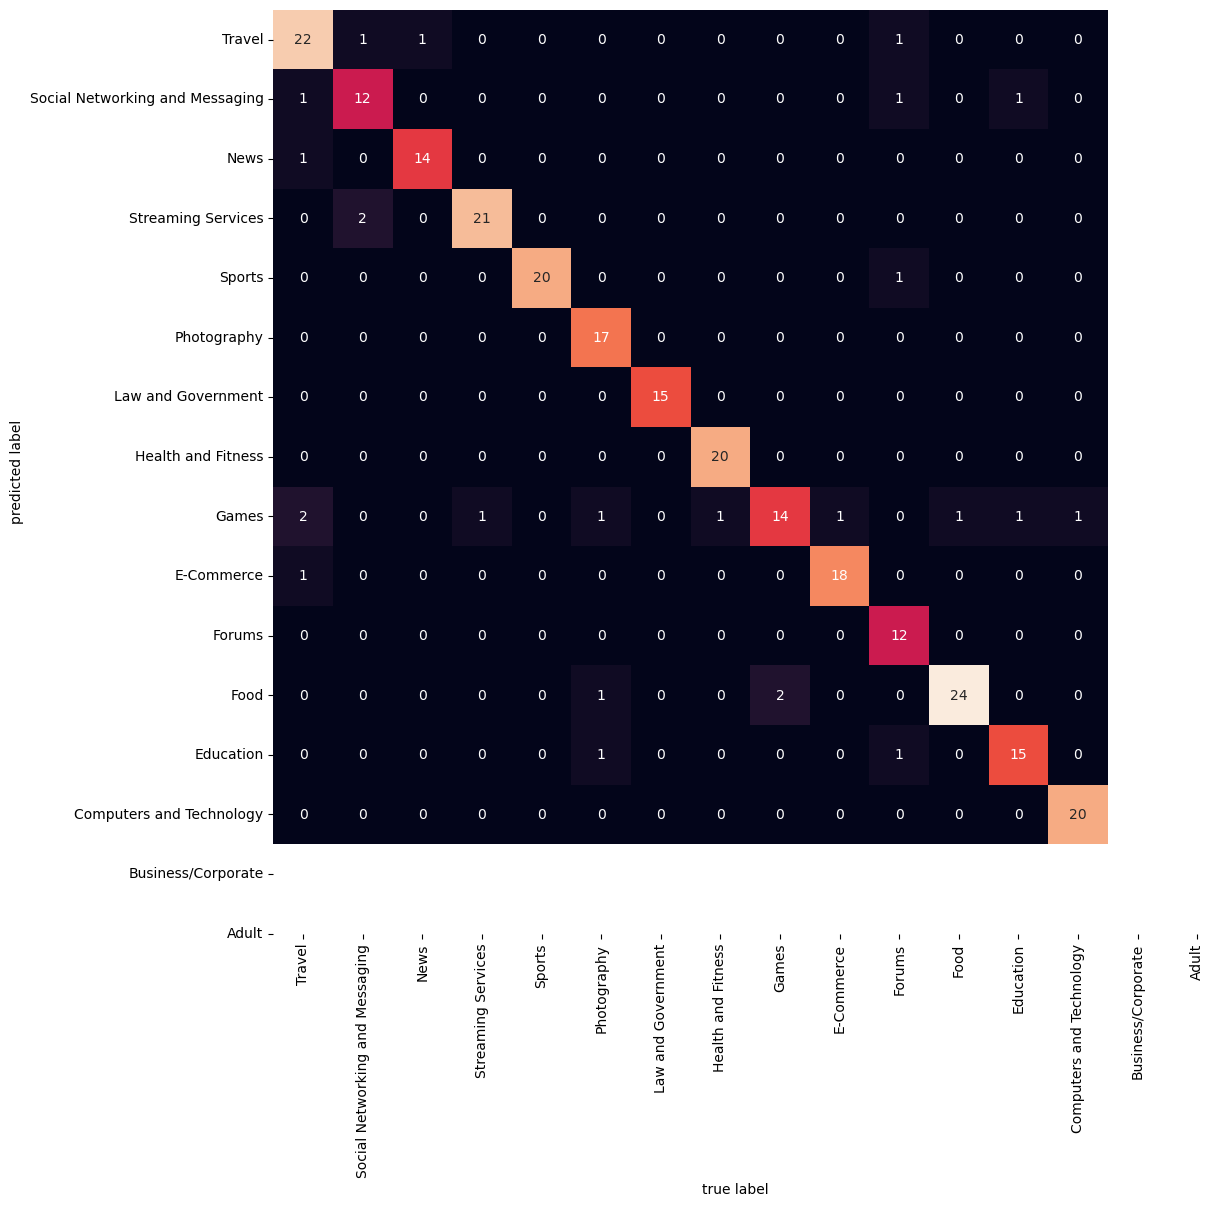

In [50]:
mat = confusion_matrix(y_test, model_naive.predict(X_test))
plt.figure(figsize=(18,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=categories,yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Testing Data

In [51]:
data = pd.read_excel('./websites list - sample data.xlsx')
data.to_csv('./websites_test.csv',index=False)
data=pd.read_csv('./websites_test.csv',index_col=False)
print(data.head())

             SITES
0      www.msn.com
1      www.cnn.com
2      weather.com
3  www.foxnews.com
4      quizlet.com


In [52]:
df = data.sample(n=5)
for x in df.index:
    df['SITES'][x] = 'http://'+ df['SITES'][x]
'''for x in df.index:
    print(df['SITES'][x])'''

"for x in df.index:\n    print(df['SITES'][x])"

In [53]:
# Web Scraping
from bs4 import BeautifulSoup
import requests
import os
# Request to website and download HTML contents
def check_meta(x):
    url=x
    try:
        req=requests.get(url)
        content=req.text
        st=""
        soup=BeautifulSoup(content)
        f = open("./webdata.txt", "w", encoding="utf-8")
        for data in soup.find_all({"meta":"content"}):
            sum1 = data.get_text()
            st+=sum1
        L=st.split()
        for i in range(len(L)):
            f.writelines(L[i]+" ")
        if os.path.getsize("./webdata.txt") == 0:
            headcall(url)
        f.close()
        f=open("./webdata.txt", "r", encoding="utf-8")
        s=""
        for x in f.readlines():
            s+=x
        return s
    except:
        return 'No'
def headcall(x):
    url=x
    try:
        req=requests.get(url)
        content=req.text
        st=""
        soup=BeautifulSoup(content)
        f = open("./webdata.txt", "w", encoding="utf-8")
        for data in soup.find_all("head"):
            sum1 = data.get_text()
            st+=sum1
        L=st.split()
        for i in range(len(L)):
            f.writelines(L[i]+" ")
        f.close()
        f=open("./webdata.txt", "r", encoding="utf-8")
        s=""
        for x in f.readlines():
            s+=x
        return s
    except:
        return 'No'

In [54]:
def clean(s):
    #regular_punct = list(string.punctuation)
    stop_words = set(stopwords.words('english'))
    s=text_preprocessing(s)
    return s

In [55]:
def vect(sar):
    ip=np.zeros((1,58533))
    ip = pd.DataFrame(data=ip,columns = temp.get_feature_names())
    for x in sar:
        if x in  temp.get_feature_names():
            ip[x]+=1
    return ip

In [67]:
sp=["Sports","Games"]
nw=["News","Law and Government"]
nwlib=["E-Commerce","Business/Corporate","Education"]
ent=["Streaming Services","Social Networking and Messaging","Photography"]
gen=["Travel","Food","Health and Fitness","Computers and Technology"]
for x in df.index:
    print("Website:"+df["SITES"][x])
    s = check_meta(df["SITES"][x])
    if s == 'No':
        print("Website not found\n")
    else:
        s=clean(s)
        sar = s.split()
        p=vect(sar)
        output=model_naive.predict(p)
        y=str(output[0])
        if y in sp:
            print("Category:Sports")
        elif y in nw:
            print("Category:News Conservative")
        elif y in nwlib:
            print("Category:News Liberal")
        elif y in ent:
            print("Category:Entertainment")
        else:
            print("Category:General")
        print()

Website:http://www.basketballnetwork.net
Category:Sports

Website:http://spinditty.com
Category:News Liberal

Website:http://worksheets.theteacherscorner.net
Category:News Liberal

Website:http://www.listal.com
Category:Entertainment

Website:http://edhrec.com
Category:News Liberal



In [70]:
input_website=input("Enter the URL:")
string="https://"+input_website
s = check_meta(string)
if s == 'No':
    print("Website not found\n")
else:
    s=clean(s)
    sar = s.split()
    p=vect(sar)
    output=model_naive.predict(p)
    y=str(output[0])
    if y in sp:
        print("Category:Sports")
    elif y in nw:
        print("Category:News Conservative")
    elif y in nwlib:
        print("Category:News Liberal")
    elif y in ent:
        print("Category:Entertainment")
    else:
        print("Category:General")

Enter the URL:www.bmsit.ac.in
Website not found

